# Lyons Housing Visualization

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
#load the data, change the file address

infile= "/content/drive/MyDrive/Colab Notebooks/Spring 2024/Machine Learning and Data Mining /Data/lyon_housing.csv"
lyon=pd.read_csv(infile)

In [88]:
lyon.head()

,date_transaction,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,prix,adresse,commune,latitude,longitude,date_construction,anciennete
0,2019-10-31,ancien,maison,5,100.0,NaN,247.0,0,530000.0,6 PAS DES ANTONINS,Villeurbanne,45.781673,4.879333,2003-06-11 11:38:24,16.387783
1,2018-11-26,ancien,maison,2,52.0,NaN,156.0,0,328550.0,12 RUE DU LUIZET,Villeurbanne,45.783240,4.884683,2003-06-11 11:38:24,15.459633
2,2016-08-04,ancien,appartement,1,28.0,28.2,0.0,1,42500.0,4 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.148839
3,2016-11-18,ancien,appartement,3,67.0,66.3,0.0,1,180900.0,6 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.439058
4,2016-12-16,ancien,appartement,1,28.0,NaN,0.0,1,97000.0,163 AV ROGER SALENGRO,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.515719


This data is from https://www.kaggle.com/benoitfavier/lyon-housing

type_achat-  ancien means existing house,  VEFA= sale prior to completion

type bien- house or apartment

nombre_pieces- probably number of rooms, use this

Surface_legement-interior space in square meeters

surface_carrez_logment-area with roof height under 1.8 m  (drop this variable)

surface_terrain- drop this

nombre_parkings- parking spots

prix- selling price,   predict this

anciennete- age of the property in years



In [89]:
lyon.shape

(40516, 15)

Convert the dates into Pandas datetime variables, so we can extract the year of the build and the year of the sale

It is also possible to extract quarter of the year from the datetime variables,  or even months,  we could look for seasonality in prices if so inclined

Anyway, extract the year of the sale,   that is a categorical variable we will want

In [90]:
lyon['date_transaction']=pd.to_datetime(lyon['date_transaction'])

In [91]:
lyon['year_transaction']=lyon['date_transaction'].dt.year

In [92]:
lyon['date_construction']=pd.to_datetime(lyon['date_construction'])



In [93]:
lyon['year_construction']=lyon['date_construction'].dt.year

In [94]:
lyon.head()

,date_transaction,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,prix,adresse,commune,latitude,longitude,date_construction,anciennete,year_transaction,year_construction
0,2019-10-31,ancien,maison,5,100.0,NaN,247.0,0,530000.0,6 PAS DES ANTONINS,Villeurbanne,45.781673,4.879333,2003-06-11 11:38:24,16.387783,2019,2003
1,2018-11-26,ancien,maison,2,52.0,NaN,156.0,0,328550.0,12 RUE DU LUIZET,Villeurbanne,45.783240,4.884683,2003-06-11 11:38:24,15.459633,2018,2003
2,2016-08-04,ancien,appartement,1,28.0,28.2,0.0,1,42500.0,4 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.148839,2016,2003
3,2016-11-18,ancien,appartement,3,67.0,66.3,0.0,1,180900.0,6 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.439058,2016,2003
4,2016-12-16,ancien,appartement,1,28.0,NaN,0.0,1,97000.0,163 AV ROGER SALENGRO,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.515719,2016,2003


In [95]:
# how about the age of the property?
lyon['anciennete'].describe()

count    40516.000000
mean        21.246938
std          9.397379
min         -3.853563
25%         15.064690
50%         26.571388
75%         28.775403
max         31.494144
Name: anciennete, dtype: float64

# Convert from a continuous variable into categorical,  using Pandas cut

There is too much detail in the age of properties, use the cut function in pandas to convert this to a limited number of categories



In [96]:
temp=pd.cut(lyon.anciennete,bins=[-5,0,5,10,20,30,40],labels=['UnderConstruction','0-5','5-10','10-20','20-30','30+'])

In [97]:
lyon['age']=temp

In [98]:
lyon.head(3)

,date_transaction,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,prix,adresse,commune,latitude,longitude,date_construction,anciennete,year_transaction,year_construction,age
0,2019-10-31,ancien,maison,5,100.0,NaN,247.0,0,530000.0,6 PAS DES ANTONINS,Villeurbanne,45.781673,4.879333,2003-06-11 11:38:24,16.387783,2019,2003,10-20
1,2018-11-26,ancien,maison,2,52.0,NaN,156.0,0,328550.0,12 RUE DU LUIZET,Villeurbanne,45.783240,4.884683,2003-06-11 11:38:24,15.459633,2018,2003,10-20
2,2016-08-04,ancien,appartement,1,28.0,28.2,0.0,1,42500.0,4 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.148839,2016,2003,10-20


Okay,  that's as far as I will go in addressing a couple of issues there,  your turn.

Text(0, 0.5, 'Price')

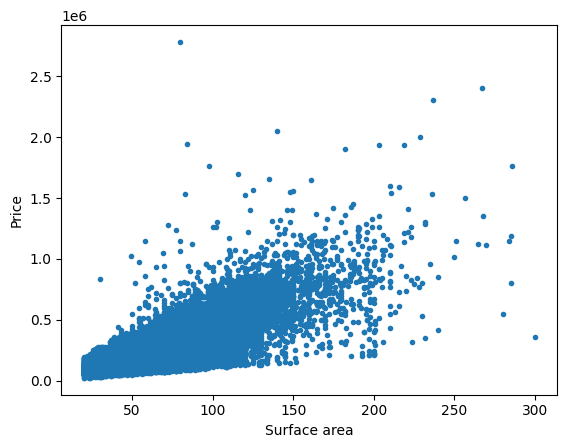

In [99]:
import matplotlib.pyplot as plt

plt.plot(lyon.surface_logement, lyon.prix,'.')
plt.xlabel('Surface area')
plt.ylabel('Price')

# Visualization of the Lyon Housing Data Using Dask

This data set is small enough that we can visualize it using Pandas effectively.

But, to get a bit more practice with Dask,  let's process the data entirely in DASK, then use Pandas,  Matlabplot and Seaborn to do the plotting

Dask will run slower than Pandas would, using it for this set would not be recommended as a general practice

We will load the lyon housing data into a Dask Dataframe

In [100]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

In [101]:
#load the data, change the file address to match your system

infile= "/content/drive/MyDrive/Colab Notebooks/Spring 2024/Machine Learning and Data Mining /Data/lyon_housing.csv"
lyon_dd=dd.read_csv(infile)

In [102]:
lyon_dd.head()

,date_transaction,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,prix,adresse,commune,latitude,longitude,date_construction,anciennete
0,2019-10-31,ancien,maison,5,100.0,NaN,247.0,0,530000.0,6 PAS DES ANTONINS,Villeurbanne,45.781673,4.879333,2003-06-11 11:38:24,16.387783
1,2018-11-26,ancien,maison,2,52.0,NaN,156.0,0,328550.0,12 RUE DU LUIZET,Villeurbanne,45.783240,4.884683,2003-06-11 11:38:24,15.459633
2,2016-08-04,ancien,appartement,1,28.0,28.2,0.0,1,42500.0,4 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.148839
3,2016-11-18,ancien,appartement,3,67.0,66.3,0.0,1,180900.0,6 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.439058
4,2016-12-16,ancien,appartement,1,28.0,NaN,0.0,1,97000.0,163 AV ROGER SALENGRO,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.515719


## Question:  Categoricals
    
    Find the mean price grouped by type_achat and type_bien
    produce a barplot showing this information.    Can you add the standard deviation value to the barplot?
    
    Produce the same barplot of surface_logement by type_achat and type_bien

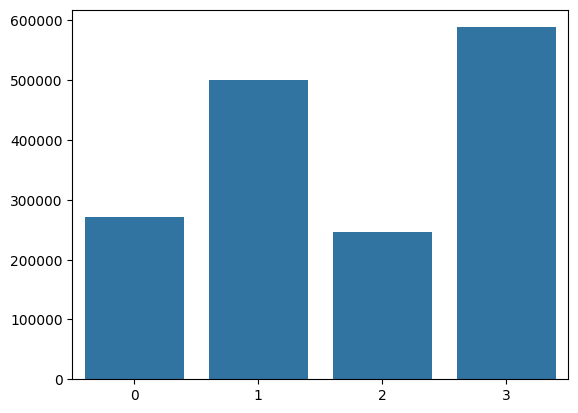

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_prices = lyon_dd.groupby(['type_achat', 'type_bien'])['prix'].mean()

sns.barplot(data=mean_prices)
plt.show()

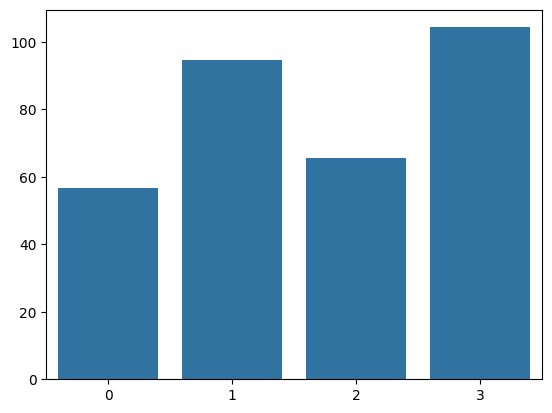

In [104]:
surface_logement = lyon_dd.groupby(['type_achat', 'type_bien'])['surface_logement'].mean()
sns.barplot(data=surface_logement)
plt.show()

# Question

Use pandas to cut up (or bin) the surface_logement into 10 equal categories and create a boxplot of prix versus surface,   showing the mean value plus a standard deviation

    

<Axes: xlabel='surface_logement_bins'>

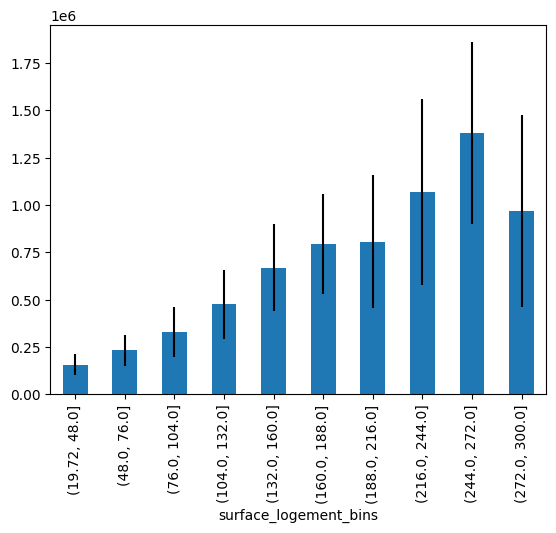

In [145]:
lyon_dd['surface_logement'] = lyon_dd['surface_logement'].map_partitions(lambda df: df.astype(int))

lyon_dd['surface_logement_bins'] = lyon_dd['surface_logement'].map_partitions(pd.cut, bins=10)

mean_price_by_bins = lyon_dd.groupby('surface_logement_bins')['prix'].mean().compute()

std_price_by_bins = lyon_dd.groupby('surface_logement_bins')['prix'].std().compute()

mean_price_by_bins.plot.bar(yerr=std_price_by_bins)

# Question:
how about mean prix versus month of the sale?

<Axes: xlabel='month_transaction'>

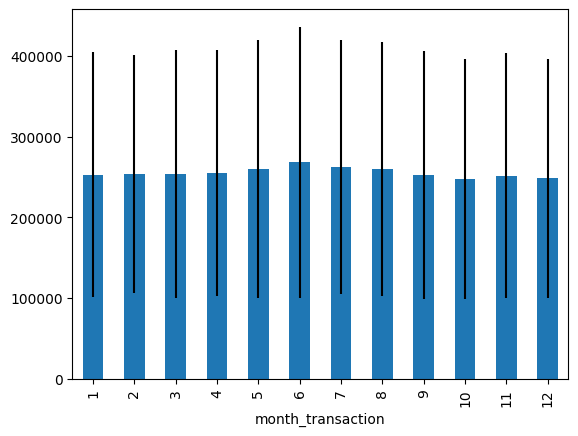

In [160]:
lyon_dd['date_transaction']=dd.to_datetime(lyon_dd['date_transaction'])
lyon_dd['month_transaction']=lyon_dd['date_transaction'].dt.month
mean_prix_by_month = lyon_dd.groupby('month_transaction')['prix'].mean().compute()
std_prix_by_month = lyon_dd.groupby('month_transaction')['prix'].std().compute()

mean_prix_by_month.plot.bar(yerr=std_prix_by_month)

# Question

Produce a plot of prix vs nombre pieces.    Do this using stratified sampling of 10% of the data set,  stratifying on type_achat, so the percentages of the two levels of this category are
present in the data.

Also produce a second subsampling that has equal counts of the two levels

<Axes: xlabel='nombre_pieces', ylabel='prix'>

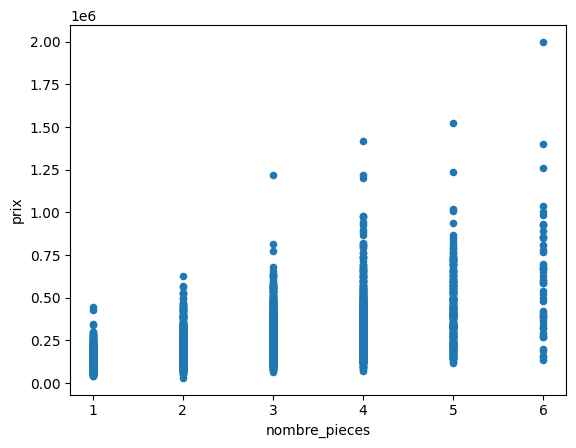

In [173]:
lyon_dd_s=lyon_dd.sample(frac=1/10, replace=None, random_state=10).compute()
lyon_dd_s.plot.scatter(x= 'nombre_pieces', y = 'prix')